# Creating the PSF with SIXTE

I have struggled to use an anlytical implementation of the PSF as the documentation is sparse and does not seem to really work for some reason. I then resorted to using the PSF produced by SIXTE as output to a photon list of a perfect point source at 1 keV.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import cmasher as cmr

I create a photon list with all photons at 1 keV and at RA, DEC = 0

In [3]:
phlist = fits.open('../../data/ph_list_for_PSF.fits')

In [8]:
print('Photon energies [keV] : ',phlist[2].data['ENERGY'][:5])

Photon energies [keV] :  [1. 1. 1. 1. 1.]


In [11]:
print('Photon right ascensions [rad] : ',phlist[2].data['RA'][:4])

Photon right ascensions [rad] :  [9.99999997e-07 9.99999997e-07 9.99999997e-07 9.99999997e-07]


In [12]:
print('Photon declinations [rad] : ',phlist[2].data['DEC'][:4])

Photon declinations [rad] :  [9.99999997e-07 9.99999997e-07 9.99999997e-07 9.99999997e-07]


Now use `sixte` with files defining instrument

In [21]:
std_xmlfile = '/xifu/usr/share/sixte/instruments/athena-xifu_2024_11/baseline/xifu_nofilt_infoc.xml'
simputfile = '../../data/ph_list_for_PSF.fits'
exposure = 1e5
eventfile = '../../data/event_list_for_PSF.evt'

In [22]:
import subprocess

In [23]:
subprocess.run(['sixtesim',
                  'XMLFile='+std_xmlfile,
                  'Background=no',
                  'RA=0.0',
                  'Dec=0.0',
                  'Simput='+simputfile, 
                  'Exposure=%g'%exposure,
                  'clobber=yes',
                  'EvtFile=%s' % eventfile])

initialize ...
Expected number of pixels in hexagon: 1504
Expected number of pixels in hexagon: 1504
Seed = 432048233
Expected number of pixels in hexagon: 1504
Expected number of pixels in hexagon: 1504
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
try to load all spectra ('../../data/ph_list_for_PSF.fits[PHLIST,1]') into cache ...
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
Number of pixels after removing overlaps: 1504


start simulation ...

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|--

CompletedProcess(args=['sixtesim', 'XMLFile=/xifu/usr/share/sixte/instruments/athena-xifu_2024_11/baseline/xifu_nofilt_infoc.xml', 'Background=no', 'RA=0.0', 'Dec=0.0', 'Simput=../../data/ph_list_for_PSF.fits', 'Exposure=100000', 'clobber=yes', 'EvtFile=../../data/event_list_for_PSF.evt'], returncode=0)

Convert the event list to count map

In [24]:
# aminconv is a conversion parameter of pixel size in arcmin
# This calculation is weird but inherited from Edoardo, so for consistency I use the same
pitch=317e-4 #in cm
NbPix=1504 #as in SIXTE
focal=1200. #in cm
surf=pitch**2
Field=4*np.arcsin(np.sin(np.arctan2(pitch,2.*focal))**2)
Fieldamin=Field*(180/np.pi*60.)**2
aminconv=np.sqrt(Fieldamin)

In [25]:
image_file = '../../data/PSF_image_test.fits'

In [26]:
subprocess.check_call(["imgev",
                            "EvtFile="+eventfile,
                            "Image="+image_file,
                            "NAXIS1=58","NAXIS2=58",
                            "CRVAL1=0.0","CRVAL2=0.0",
                           "CRPIX1=29.","CRPIX2=29.",
                           "CDELT1=-%.15f" %(aminconv/60.),
                           "CDELT2=%.15f" %(aminconv/60.),
                           "CoordinateSystem=0",
                           "Projection=TAN",
                           "CUNIT1=deg",
                           "CUNIT2=deg"])

initialize ...
open event file '../../data/event_list_for_PSF.evt' ...
Given file is not a standard Event File, trying to read it as TES Event File...
open TES event file '../../data/event_list_for_PSF.evt' ...
finished successfully!



0

## Image of the PSF

In log10

/tmp/ipykernel_8195/1135695734.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(fits.getdata('../../data/PSF_image_test.fits')), cmap = cmr.ember)


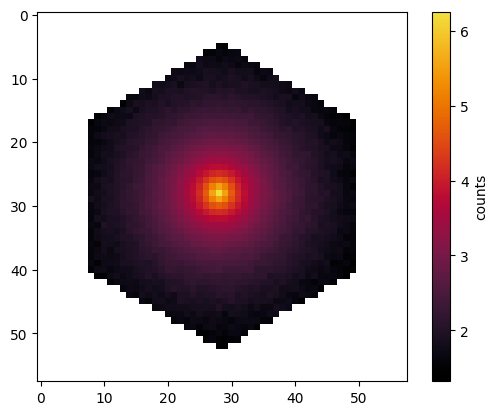

In [32]:
plt.imshow(np.log10(fits.getdata('../../data/PSF_image_test.fits')), cmap = cmr.ember)
plt.colorbar(label = 'log10 counts')

Natural

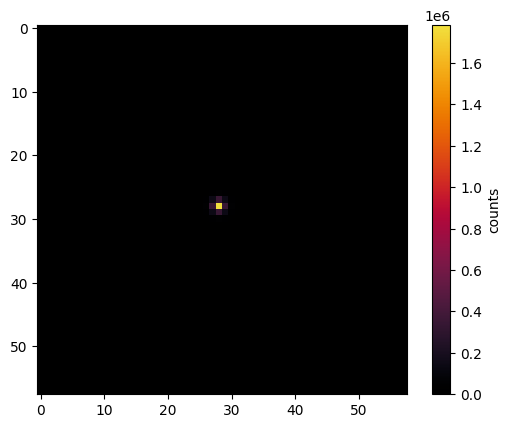

In [33]:
plt.imshow(fits.getdata('../../data/PSF_image_test.fits'), cmap = cmr.ember)
plt.colorbar(label = 'counts')